
# Data Exploration

In [2]:


import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
layoffs = pd.read_excel("tech_layoffs.xlsx")

In [4]:
layoffs['Date_layoffs'] = pd.to_datetime(layoffs['Date_layoffs'])

In [4]:
layoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   #                            1418 non-null   int64         
 1   Company                      1418 non-null   object        
 2   Location_HQ                  1418 non-null   object        
 3   Country                      1418 non-null   object        
 4   Continent                    1418 non-null   object        
 5   Laid_Off                     1418 non-null   int64         
 6   Date_layoffs                 1418 non-null   datetime64[ns]
 7   Percentage                   1418 non-null   float64       
 8   Company_Size_before_Layoffs  1418 non-null   int64         
 9   Company_Size_after_layoffs   1418 non-null   int64         
 10  Industry                     1418 non-null   object        
 11  Stage                        1418 non-null 

In [5]:
print(layoffs.isna().sum()) #No NA values

#                              0
Company                        0
Location_HQ                    0
Country                        0
Continent                      0
Laid_Off                       0
Date_layoffs                   0
Percentage                     0
Company_Size_before_Layoffs    0
Company_Size_after_layoffs     0
Industry                       0
Stage                          0
Money_Raised_in_$_mil          0
Year                           0
lat                            0
lng                            0
dtype: int64


In [6]:
layoffs.drop(["lat", "lng", "#"], axis=1, inplace=True)


# Generating visualisations

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x2000 with 0 Axes>

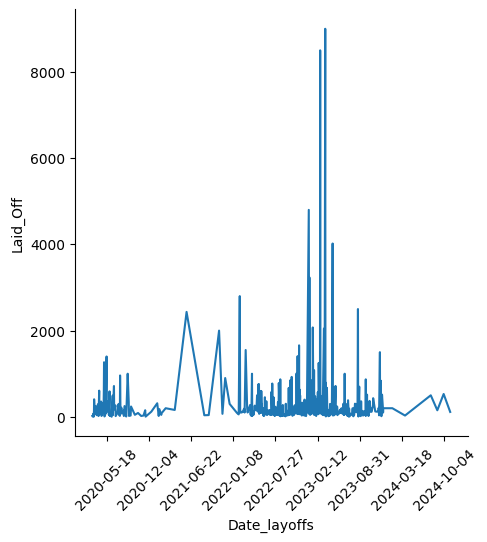

In [7]:
plt.figure(figsize=(10, 20))
sns.relplot(data=layoffs, x="Date_layoffs", y="Laid_Off", kind="line", ci = None)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))
plt.show()

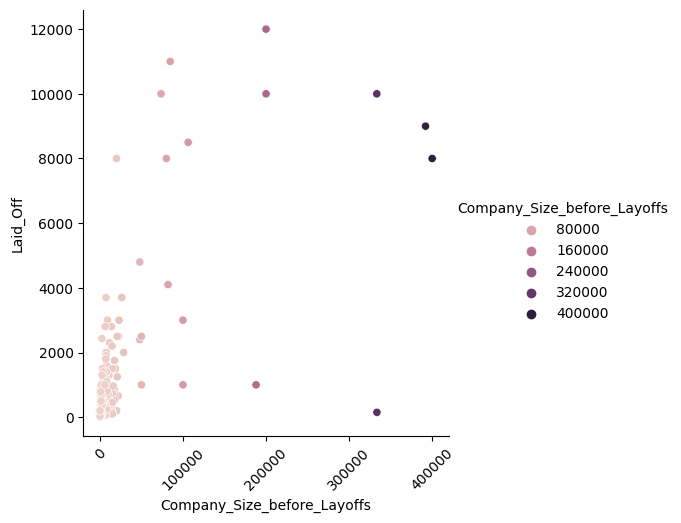

In [8]:
sns.relplot(x="Company_Size_before_Layoffs", y="Laid_Off", data=layoffs, kind="scatter", hue = "Company_Size_before_Layoffs")
plt.xticks(rotation=45)
plt.show()

In [9]:
top10layoffs_year = layoffs.groupby("Year").agg({"Laid_Off": "sum"}).nlargest(10, "Laid_Off")

In [10]:
top10layoffs_year

,Laid_Off
Year,
2023,177026
2022,129031
2020,61960
2021,6790
2024,4355


In [11]:
top5layoffs_company = layoffs.groupby(["Year", "Company"]).agg({"Laid_Off": "sum"}).reset_index()
top5layoffs_company = top5layoffs_company.groupby("Year").apply(lambda x: x.nlargest(5, "Laid_Off")).reset_index(drop=True)

/tmp/ipykernel_18/4170874620.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5layoffs_company = top5layoffs_company.groupby("Year").apply(lambda x: x.nlargest(5, "Laid_Off")).reset_index(drop=True)


In [12]:
top5layoffs_company

,Year,Company,Laid_Off
0,2020,Uber,7525
1,2020,Groupon,2800
2,2020,Swiggy,2250
3,2020,Airbnb,1900
4,2020,PaisaBazaar,1500
5,2021,Katerra,2434
6,2021,Zillow,2000
7,2021,Better.com,900
8,2021,Dropbox,315
9,2021,Delivery Hero,300


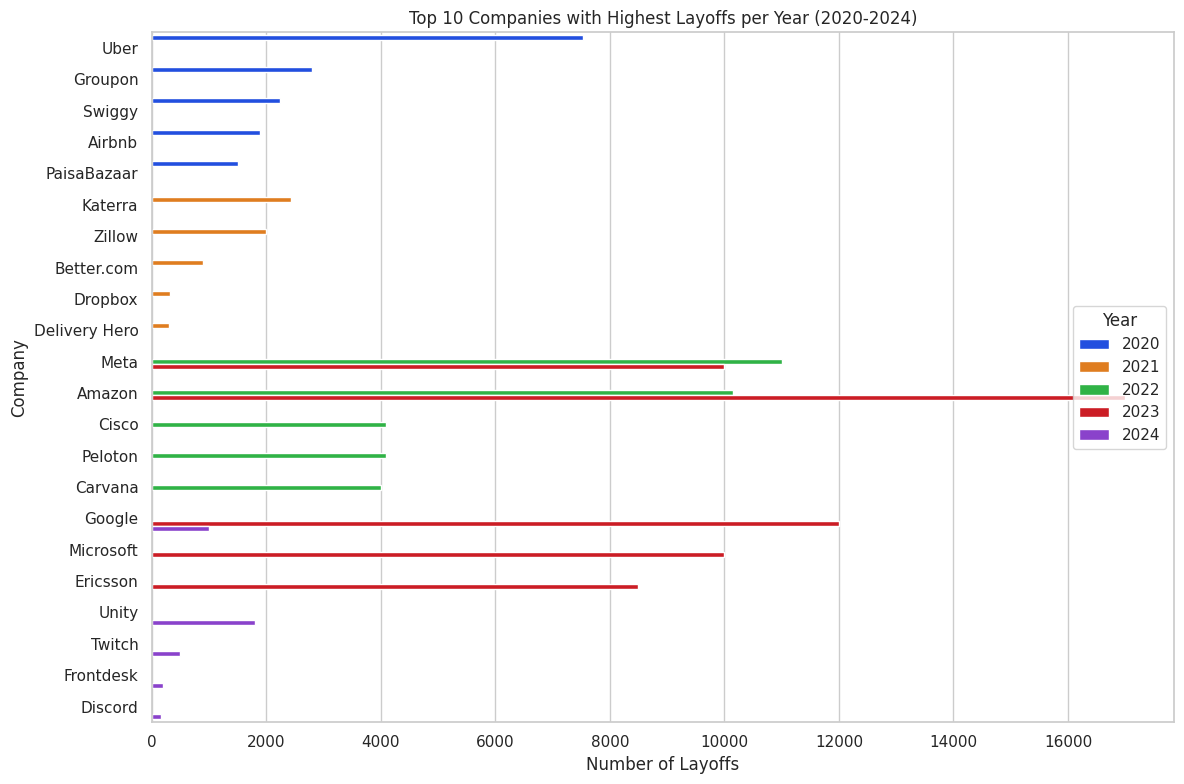

In [13]:
sns.set(style="whitegrid")
sns.set_palette("bright")


plt.figure(figsize=(12, 8))
sns.barplot(data=top5layoffs_company, x="Laid_Off", y="Company", hue="Year", dodge=True)
plt.xlabel("Number of Layoffs")
plt.ylabel("Company")
plt.title("Top 10 Companies with Highest Layoffs per Year (2020-2024)")
plt.legend(title="Year")
plt.tight_layout()
plt.show()

In [14]:
top5layoffs_industry = layoffs.groupby(["Year", "Industry"]).agg({"Laid_Off": "sum"}).reset_index()
top5layoffs_industry = top5layoffs_industry.groupby("Year").apply(lambda x: x.nlargest(5, "Laid_Off")).reset_index(drop=True)

/tmp/ipykernel_18/1953894525.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5layoffs_industry = top5layoffs_industry.groupby("Year").apply(lambda x: x.nlargest(5, "Laid_Off")).reset_index(drop=True)


In [15]:
top5layoffs_industry

,Year,Industry,Laid_Off
0,2020,Transportation,13606
1,2020,Retail,7615
2,2020,Travel,6064
3,2020,Finance,5714
4,2020,Food,5629
5,2021,Real Estate,2900
6,2021,Construction,2434
7,2021,Food,567
8,2021,Other,315
9,2021,Transportation,200


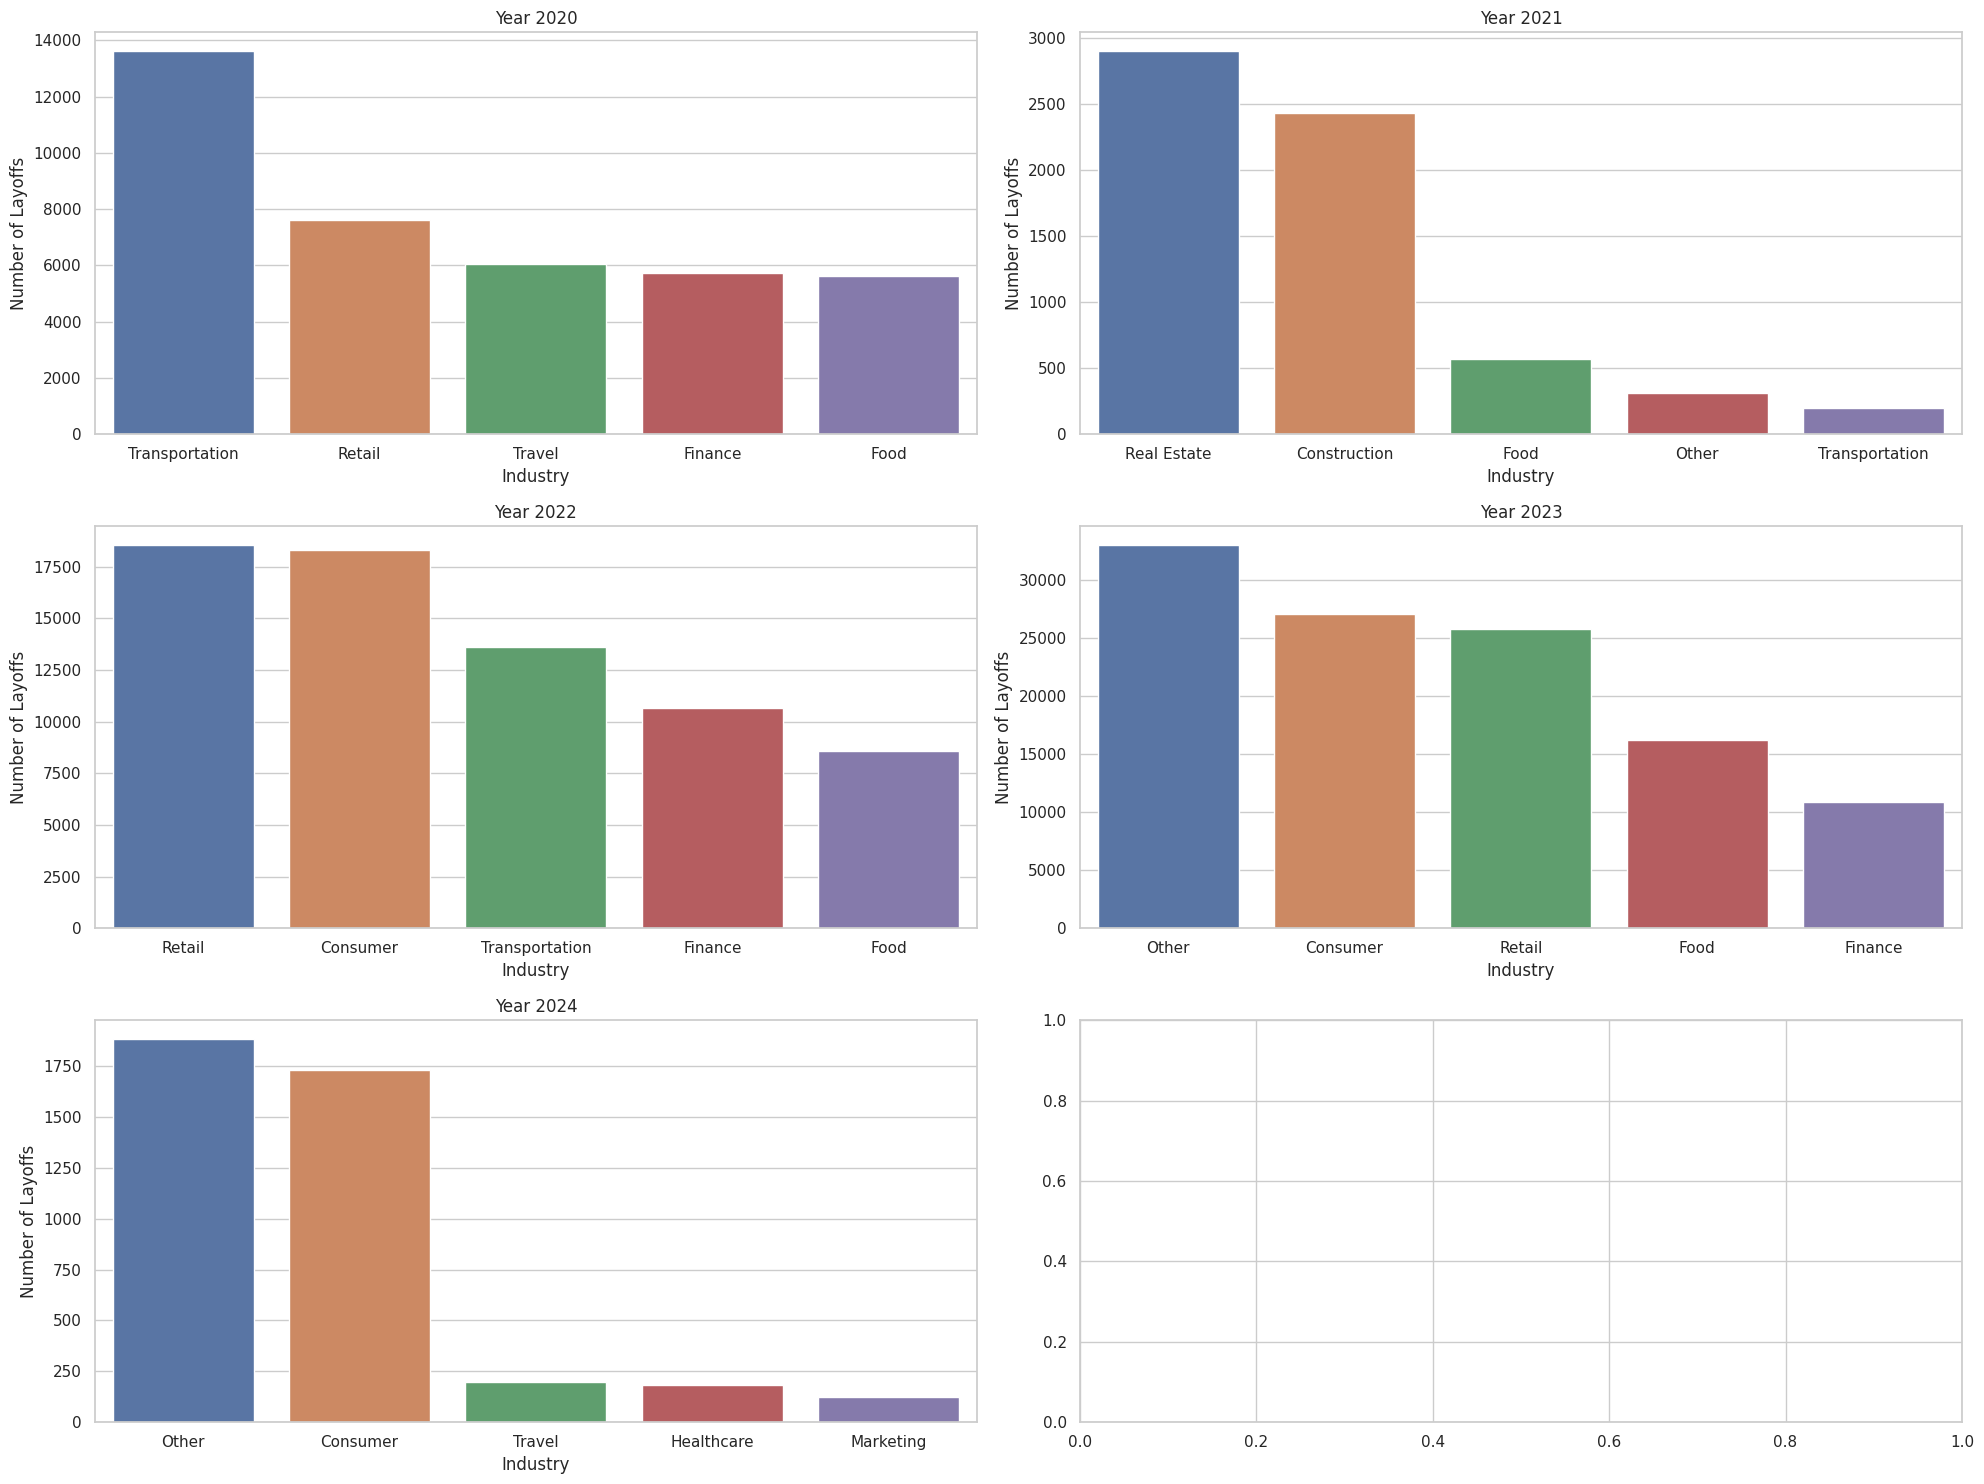

In [16]:
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

years = sorted(top5layoffs_industry['Year'].unique())  # Get unique years from the DataFrame

for i, year in enumerate(years):
    # Filter data for the current year
    data_year = top5layoffs_industry[top5layoffs_industry['Year'] == year]
    
    # Determine the subplot position
    row = i // 2
    col = i % 2
    
    # Plot for the current year
    sns.barplot(data=data_year, x="Industry", y="Laid_Off", ax= axes[row, col])
    axes[row, col].set_title(f"Year {year}")
    axes[row, col].set_xlabel("Industry")
    axes[row, col].set_ylabel("Number of Layoffs")
plt.tight_layout()
plt.show()

In [17]:
top10layoffs_country = layoffs.groupby("Country").agg({"Laid_Off": "sum"}).nlargest(10, "Laid_Off").reset_index()
top10layoffs_country

,Country,Laid_Off
0,USA,273981
1,India,25490
2,Germany,15424
3,Sweden,12447
4,United Kingdom,11915
5,Canada,8448
6,Brazil,7029
7,Singapore,4795
8,Israel,3310
9,Indonesia,2721


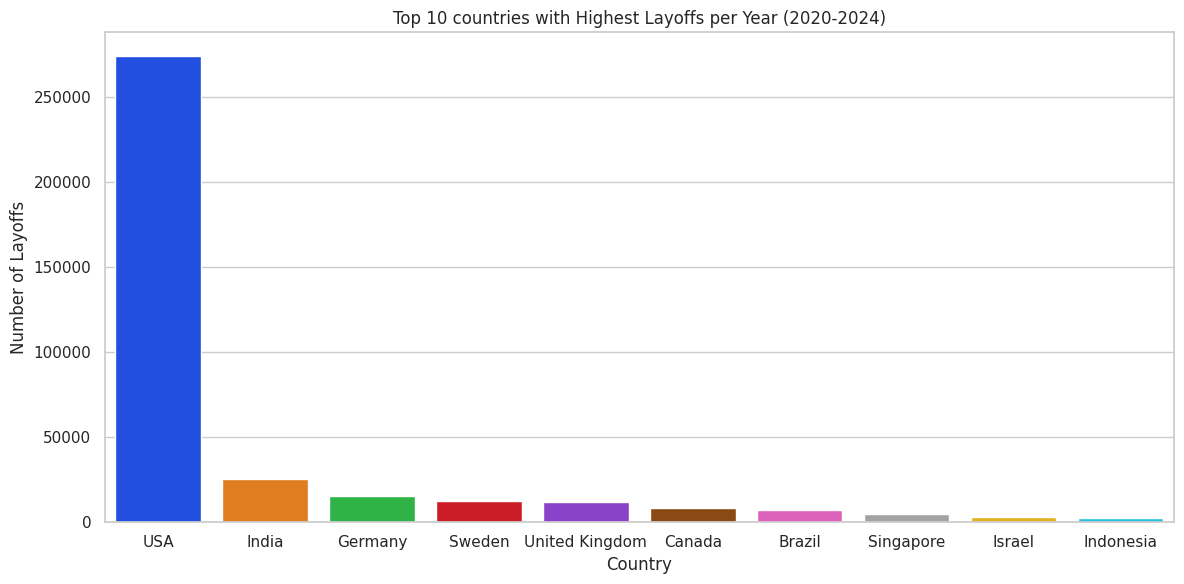

In [18]:
# sns.barplot(data = top10layoffs_country, x ="Country", y = "Laid_Off")
# plt.show()

sns.set(style="whitegrid")
sns.set_palette("bright")


plt.figure(figsize=(12, 6))
sns.barplot(data = top10layoffs_country, x ="Country", y = "Laid_Off", dodge=True)
plt.xlabel("Country")
plt.ylabel("Number of Layoffs")
plt.title("Top 10 countries with Highest Layoffs per Year (2020-2024)")
plt.tight_layout()
plt.show()


# Overall insights

* Aggregating the number of layoffs (summation), the highest lay off happened on 2023 with a total of 177026 layoffs. This might be due to economic recession and the tech industry was heavily impacted.

* In year 2021, majority of the layoffs happened in tech jobs presiding in the real estate and construction industries. This could be explained by COVID-19 disruptions where constructions were put on hold.

* Whereas in 2022, majority of the tech layoffs shifted to retail, consumer industries. Speculated reasons could be due to economic recession and as unemployment increases, the demand for consumable goods falls. The tech layoffs in consumer industry remained consistently one of the top in year 2022 to 2024.

* There are some relationship between big companies to the magnitude of layoffs.

* Google, Meta and Amazon were one of the top companies for 2 years. 